In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt


In [2]:
dataset = pd.read_csv("C:/1. My Laptop/5. Study/Python/Data Analyst Jobs Dataset/Dataset_(Project) Data_Analysis_Job_Market.csv")

In [3]:
df = dataset.copy()
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [5]:
df.shape

(2253, 16)

### Analysis Purposes
1. Consumers of this report: Job Seekers in Data Analytics field in the USA.
2. Questions to be answered.
+ What is the Salary benchmark of Data Analytics jobs?
+ What are the Top 5 Sectors that pay well? (definition of 'pay well': salary offer is above average)
+ What are the Sectors of 5/5 rated companies?
+ Where are Data Analytics jobs based in?

### Data limitation 
1. 1/2253 jobs does not have 'Salary Estimate' data 
2. 353/2253 jobs do not have 'Sector' data

In [6]:
test1 = df.loc[df['Salary Estimate'] == '-1']
test1.shape[0]

1

In [7]:
test2 = df.loc[df['Sector'] == '-1']
test2.shape[0]

353

### Data Cleaning

In [8]:
df[['Salary Estimate', 'Sector']]=df[['Salary Estimate', 'Sector']].replace('-1', None)

In [9]:
df['Seniority'] = df['Job Title'].str.lower()

df.loc[df['Seniority'].str.contains('senior|sr|manager|lead|principal|iii'), 'Seniority'] = 'Senior level'
df.loc[df['Seniority'].str.contains('junior|jr.|analyst i|entry'), 'Seniority'] = 'Junior level' 
df.loc[(~df['Seniority'].str.contains('Senior level|Junior level')), 'Seniority'] = 'Mid level'

In [10]:
df['Seniority'].value_counts()

Mid level       1550
Senior level     542
Junior level     161
Name: Seniority, dtype: int64

In [11]:
states = {'CA':'California',
       'TX':'Texas',
       'NY':'New York',
       'IL':'Illinois',
       'PA':'Pennsylvania',
       'AZ':'Arizona',
       'CO':'Colorado',
       'NC':'North Carolina',
       'NJ':'New Jersey',
       'WA':'Washington',
       'VA':'Virginia',
       'OH':'Ohio',
       'UT':'Utah',
       'FL':'Florida',
       'IN':'Indiana',
       'DE':'Delaware',
       'GA':'Georgia',
       'KS':'Kansas',
       'SC':'South Carolina'}
df['State Acronym'] = df['Location'].str[-2:]
df['State'] = df['State Acronym'].map(states)

In [12]:
df['Salary Estimate'] = df['Salary Estimate'].astype(str)
df['Min Salary'] = df['Salary Estimate'].str.extract('(\d{2})', expand=False) + "000"
df['Max Salary'] = df['Salary Estimate'].str.extract('[\D]*[\d]+[\D]+([\d]+)', expand=False) + "000"


In [13]:
salary = df[['Job Title','Sector','Seniority','Min Salary', 'Max Salary']].dropna()
salary['Min Salary'] = salary['Min Salary'].astype(int)
salary['Max Salary'] = salary['Max Salary'].astype(int)
salary['Average Salary'] = (salary['Min Salary']+ salary['Max Salary'])/2

### 1. Data Analytics Salary Benchmark

In [40]:
sy = pd.pivot_table(salary, index=['Seniority'], aggfunc= {'Min Salary': 'mean', 'Max Salary': 'mean', 'Average Salary': 'mean'})
sy.round(0)

,Average Salary,Max Salary,Min Salary
Seniority,,,
Junior level,66570.0,85154.0,47986.0
Mid level,70252.0,89192.0,51312.0
Senior level,73551.0,93339.0,53763.0


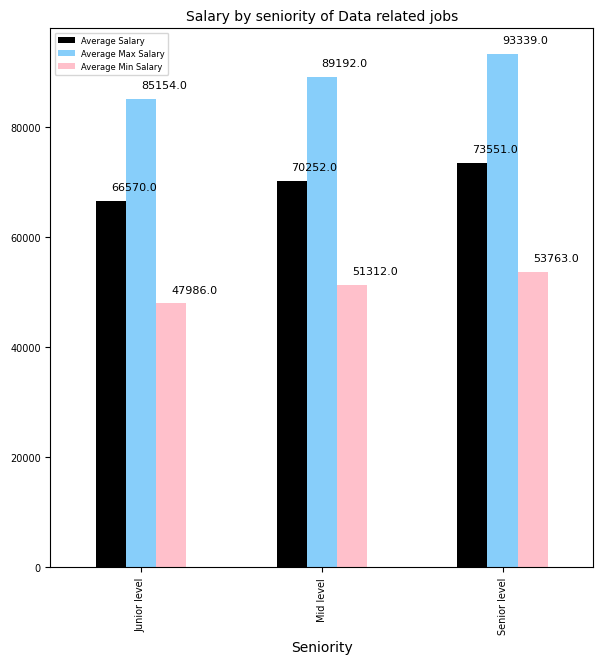

In [38]:
my_label = ['Average Salary', 'Average Max Salary', 'Average Min Salary']

sy_graph = sy.plot(kind='bar',
                  figsize = (7,7),
                  width = 0.5,
                  color = ['black', 'lightskyblue', 'pink'])
sy_graph.tick_params(labelsize = 7)
sy_graph.legend(labels = my_label,fontsize =6)
sy_graph.set_title('Salary by seniority of Data related jobs', fontsize=10)
for p in sy_graph.patches:
    sy_graph.annotate(np.round(p.get_height(),decimals=0),
                   (p.get_x()+p.get_width()/2.,p.get_height()),
                   ha='left',
                   va='center',
                   xytext=(0,10),
                   textcoords='offset points',
                   fontsize=8)


plt.show()

### 2. Top 5 Sectors offering above average salary

In [16]:
sy2 = salary.loc[salary['Average Salary'] >= (salary['Average Salary'].sum()/salary.shape[0])]
sy3 = sy2.groupby(['Sector'])['Sector'].count()

(0.0, 300.0)

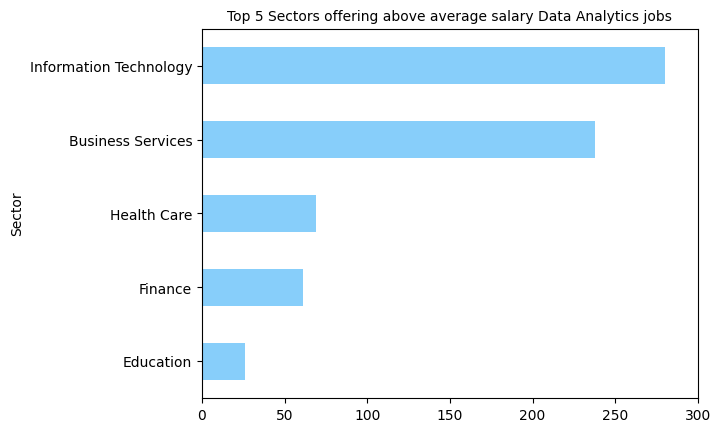

In [17]:
sy3.sort_values().tail(5).plot(kind='barh', color = 'lightskyblue')
plt.title('Top 5 Sectors offering above average salary Data Analytics jobs', fontsize =10)
plt.xlim(0,300)


### 3. Industries of companies with 5/5 company rating

In [18]:
top = df[['Rating','Company Name','Location','Headquarters','Size','Founded','Type of ownership','Industry','Sector','Revenue']].dropna()
top = top.loc[top['Rating']== 5]
top_r = top.groupby('Sector', axis = 0)['Company Name'].count()

Text(0.5, 1.0, '5.0 rated Companies by Sectors')

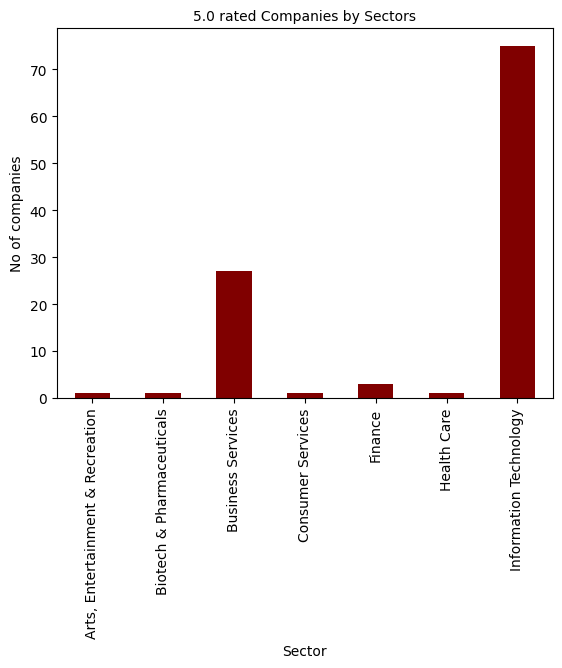

In [19]:
top_r.plot(kind='bar', ylabel='No of companies', color = 'maroon')
plt.title('5.0 rated Companies by Sectors', fontsize =10)

### 4. Location of Data Analytics Jobs

In [20]:
location = df.groupby('State')['Company Name'].count()

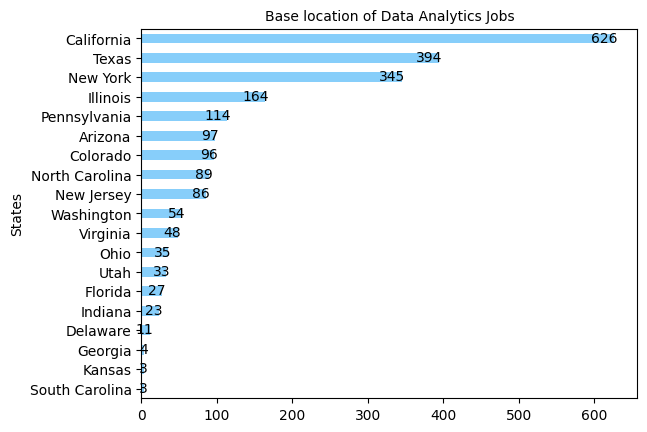

In [21]:
ln = location.sort_values().plot(kind='barh', color = 'lightskyblue')
plt.title('Base location of Data Analytics Jobs', fontsize =10)
plt.ylabel('States', fontsize=10)

for p in ln.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='right', va='center')